In [1]:
import pandas as pd

# Ruta al archivo CSV
ruta = "D:/trading/reports/backtest_heuristicas/resumen/bt_operaciones_2025-06-01.csv"

# Leer con optimización de tipos
df = pd.read_csv(ruta, low_memory=False)

# Vista general
df.shape, df.columns.tolist()


((712063, 16),
 ['id_orden',
  'fecha_entrada',
  'fecha_salida',
  'precio_entrada',
  'precio_salida',
  'signal',
  'estrategia',
  'dias',
  'resultado',
  'comision',
  'tipo_salida',
  'ticker',
  'f_win',
  'resultado_pct',
  'log_ret',
  'profit_bucket'])

In [2]:
# Ver primeras filas
df.head()


,id_orden,fecha_entrada,fecha_salida,precio_entrada,precio_salida,signal,estrategia,dias,resultado,comision,tipo_salida,ticker,f_win,resultado_pct,log_ret,profit_bucket
0,AAPL_2005-07-18_ema_pullback_v2_sell,2005-07-18,2005-07-20,1.48286,1.497689,sell,ema_pullback_v2,2,-0.6148,0.6,SL,AAPL,0,-0.414604,-0.535467,Loss
1,AAPL_2005-07-19_macd_cruce_v2_buy,2005-07-19,2005-07-25,1.53071,1.576631,buy,macd_cruce_v2,6,-0.5541,0.6,TP,AAPL,0,-0.361989,-0.449400,Loss
2,AAPL_2005-07-19_macd_hist_reversal_v2_buy,2005-07-19,2005-07-25,1.53071,1.576631,buy,macd_hist_reversal_v2,6,-0.5541,0.6,TP,AAPL,0,-0.361989,-0.449400,Loss
3,AAPL_2005-07-20_macd_hist_reversal_v2_buy,2005-07-20,2005-07-27,1.56071,1.545103,buy,macd_hist_reversal_v2,7,-0.6156,0.6,SL,AAPL,0,-0.394436,-0.501595,Loss
4,AAPL_2005-07-22_macd_hist_reversal_v2_buy,2005-07-22,2005-07-26,1.57107,1.555359,buy,macd_hist_reversal_v2,4,-0.6157,0.6,SL,AAPL,0,-0.391899,-0.497413,Loss


In [3]:
# Tipos de datos
df.dtypes


id_orden           object
fecha_entrada      object
fecha_salida       object
precio_entrada    float64
precio_salida     float64
signal             object
estrategia         object
dias                int64
resultado         float64
comision          float64
tipo_salida        object
ticker             object
f_win               int64
resultado_pct     float64
log_ret           float64
profit_bucket      object
dtype: object

In [4]:
# Estadísticas numéricas generales
df.describe()


,precio_entrada,precio_salida,dias,resultado,comision,f_win,resultado_pct,log_ret
count,712063.000000,712063.000000,712063.000000,712063.000000,7.120630e+05,712063.000000,712063.000000,700790.000000
mean,63.207553,63.255769,4.207546,-0.408456,6.000000e-01,0.222604,-0.070387,-0.045112
std,86.511986,86.596110,18.329609,1.973546,7.771567e-16,0.415995,0.327803,0.161885
min,0.060000,0.060600,2.000000,-10.177700,6.000000e-01,0.000000,-10.010000,-7.061334
25%,17.680000,17.675000,2.000000,-1.090100,6.000000e-01,0.000000,-0.036121,-0.035584
50%,36.710000,36.704800,4.000000,-0.748800,6.000000e-01,0.000000,-0.020347,-0.020266
75%,73.540000,73.600762,5.000000,-0.151800,6.000000e-01,0.000000,-0.006320,-0.005371
max,957.770020,965.176200,13958.000000,28.133100,6.000000e-01,1.000000,0.029374,0.028950


In [6]:
# Total profit por estrategia
df.groupby("estrategia")["resultado"].agg(["sum", "mean", "count"]).sort_values("mean")



,sum,mean,count
estrategia,,,
rsi_divergencia_v2,-2586.0760,-0.458280,5643
mov_avg_v2,-4724.9212,-0.446632,10579
macd_cruce_v2,-5728.5477,-0.425440,13465
breakout_volumen_fix,-4733.7751,-0.423415,11180
ema_pullback_v2,-8466.2989,-0.423167,20007
macd_hist_reversal_v2,-36379.7213,-0.418870,86852
adx_filter_trend,-42834.8462,-0.418526,102347
rsi_reversion_v2,-8176.2524,-0.417539,19582
breakout_volumen_ordered,-6369.5532,-0.415252,15339


In [7]:
df.groupby("estrategia")["resultado"].sum().loc[lambda x: x < 0].sort_values()


estrategia
ema_9_21_cruce_v2           -66274.3302
cruce_medias_v2             -51829.8848
adx_filter_trend            -42834.8462
macd_hist_reversal_v2       -36379.7213
ma_envelope_reversals_v2    -29857.3688
ema_pullback_v2              -8466.2989
rsi_reversion_v2             -8176.2524
bollinger_breakout_full      -7210.9558
bollinger_breakout_voladj    -7210.9558
breakout_volumen_ordered     -6369.5532
macd_cruce_v2                -5728.5477
soporte_resistencia_v2       -5438.9790
breakout_volumen_fix         -4733.7751
mov_avg_v2                   -4724.9212
rsi_divergencia_v2           -2586.0760
sma_10_50_cruce_v2           -1698.1240
gap_open_strategy_v2         -1325.8061
Name: resultado, dtype: float64

<Figure size 1000x1200 with 0 Axes>

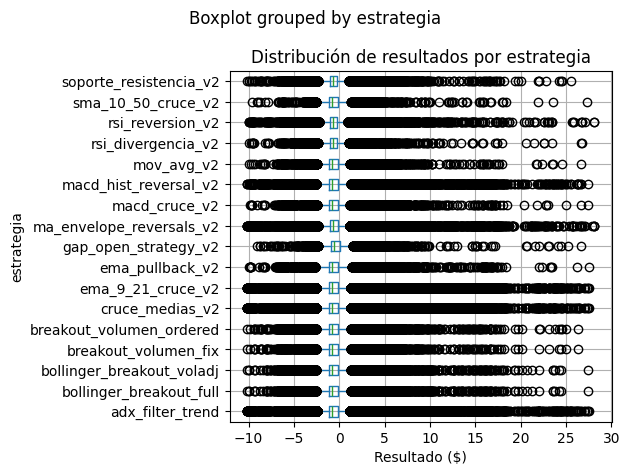

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
df.boxplot(column="resultado", by="estrategia", vert=False)
plt.title("Distribución de resultados por estrategia")
plt.xlabel("Resultado ($)")
plt.tight_layout()
plt.show()


In [9]:
df.groupby("estrategia")["f_win"].mean().sort_values()


estrategia
rsi_reversion_v2             0.206414
rsi_divergencia_v2           0.210172
soporte_resistencia_v2       0.214573
adx_filter_trend             0.214838
macd_cruce_v2                0.217527
ma_envelope_reversals_v2     0.221191
mov_avg_v2                   0.221666
ema_9_21_cruce_v2            0.222353
breakout_volumen_fix         0.223256
breakout_volumen_ordered     0.225504
cruce_medias_v2              0.226032
macd_hist_reversal_v2        0.226903
bollinger_breakout_voladj    0.227509
bollinger_breakout_full      0.227509
sma_10_50_cruce_v2           0.228451
ema_pullback_v2              0.233368
gap_open_strategy_v2         0.259828
Name: f_win, dtype: float64

<Axes: xlabel='año'>

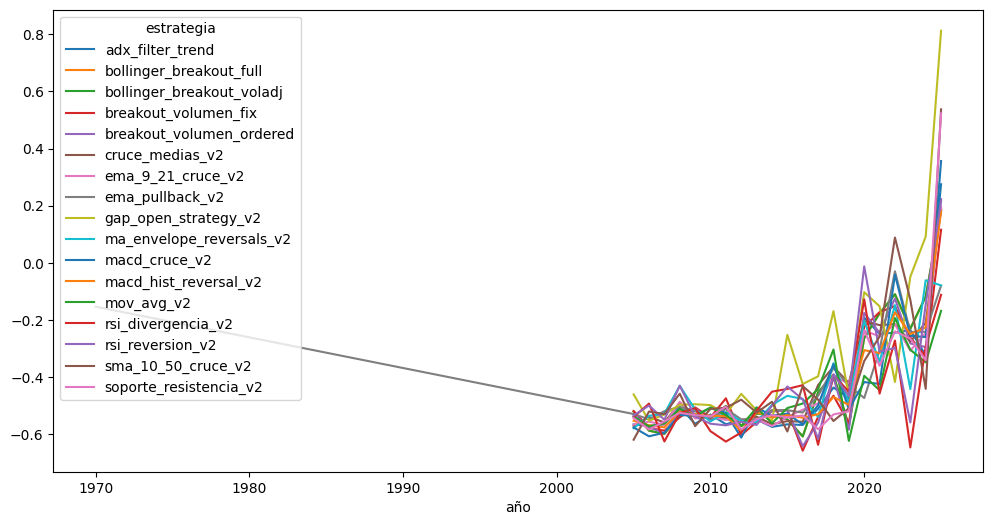

In [10]:
df["fecha_entrada"] = pd.to_datetime(df["fecha_entrada"])
df["año"] = df["fecha_entrada"].dt.year

df.groupby(["año", "estrategia"])["resultado"].mean().unstack().plot(figsize=(12,6))


In [11]:
ranking = df.groupby("estrategia").agg(
    profit_mean=("resultado", "mean"),
    winrate=("f_win", "mean")
)
ranking["score"] = ranking["profit_mean"] * ranking["winrate"]
ranking.sort_values("score")


,profit_mean,winrate,score
estrategia,,,
mov_avg_v2,-0.446632,0.221666,-0.099003
ema_pullback_v2,-0.423167,0.233368,-0.098754
rsi_divergencia_v2,-0.458280,0.210172,-0.096318
macd_hist_reversal_v2,-0.418870,0.226903,-0.095043
breakout_volumen_fix,-0.423415,0.223256,-0.094530
breakout_volumen_ordered,-0.415252,0.225504,-0.093641
macd_cruce_v2,-0.425440,0.217527,-0.092545
ema_9_21_cruce_v2,-0.412192,0.222353,-0.091652
cruce_medias_v2,-0.400890,0.226032,-0.090614


In [12]:
df.groupby("tipo_salida")["resultado"].mean().sort_values()


tipo_salida
SL        -1.244905
TIMEOUT   -0.001987
TP         1.239009
Name: resultado, dtype: float64

<Axes: xlabel='dias', ylabel='resultado'>

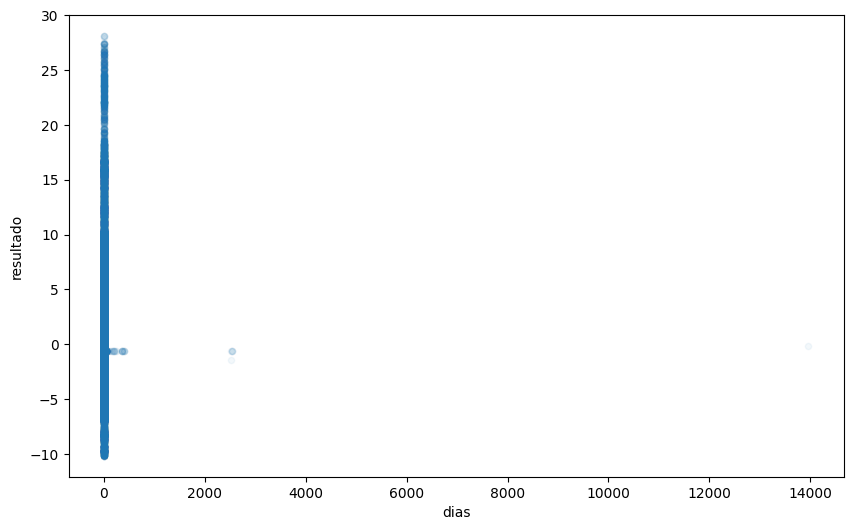

In [14]:
df.plot.scatter(x="dias", y="resultado", alpha=0.05, figsize=(10,6))



In [15]:
df_limpio = df[df["dias"] <= 60].copy()


In [16]:
df_limpio["bin_dias"] = pd.cut(df_limpio["dias"], bins=[0, 1, 3, 5, 10, 20, 30, 60])
df_limpio.groupby("bin_dias")["resultado"].mean()


C:\Users\leant\AppData\Local\Temp\ipykernel_20508\3610351787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_limpio.groupby("bin_dias")["resultado"].mean()


bin_dias
(0, 1]           NaN
(1, 3]     -0.537218
(3, 5]     -0.494185
(5, 10]    -0.045181
(10, 20]    0.013086
(20, 30]   -0.599493
(30, 60]   -0.598292
Name: resultado, dtype: float64

In [17]:
tabla_salidas = df.groupby(["estrategia", "tipo_salida"]).size().unstack(fill_value=0)
tabla_salidas_pct = tabla_salidas.div(tabla_salidas.sum(axis=1), axis=0)
tabla_salidas_pct.sort_index()


tipo_salida,SL,TIMEOUT,TP
estrategia,,,
adx_filter_trend,0.625373,0.089382,0.285245
bollinger_breakout_full,0.625321,0.080448,0.294230
bollinger_breakout_voladj,0.625321,0.080448,0.294230
breakout_volumen_fix,0.632379,0.071199,0.296422
breakout_volumen_ordered,0.629050,0.071778,0.299172
cruce_medias_v2,0.621888,0.087395,0.290718
ema_9_21_cruce_v2,0.625232,0.086905,0.287863
ema_pullback_v2,0.614985,0.131704,0.253311
gap_open_strategy_v2,0.545590,0.015031,0.439379
